# Práctica: análisis de opinión en críticas hoteleras

<img src="img/bellagio.jpg" style="width:200x;height:150;">

Vamos a poner en práctica todo lo aprendido hasta el momento sobre un problema de análisis de críticas a hoteles. El conjunto de datos que utilizaremos es una extracción de Booking.com, disponible en formato original en [Kaggle](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe).

## Instrucciones

A lo largo de este cuaderno encontrarás celdas vacías que tendrás que rellenar con tu propio código. Sigue las instrucciones del cuaderno y presta especial atención a los siguientes iconos:

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Deberás responder a la pregunta indicada con el código o contestación que escribas en la celda inferior. Se te evaluará la práctica según la corrección de tu solución, así como por la calidad del código.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Esto es una pista u observación que te puede ayudar a resolver la práctica. No tienes que escribir en el cuaderno ninguna contestación a estos apartados, pero conviene que los hagas para entender los siguientes pasos.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">Este es un ejercicio avanzado y voluntario que puedes realizar si quieres profundar más sobre el tema. No se considerará para la evaluación de la práctica, pero te animamos a intentarlo para aprender más ¡Ánimo!</td></tr>
</table>

Adicionalmente si necesitas consultar la ayuda de cualquier función python puedes colocar el cursor de escritura sobre el nombre de la misma y pulsar Mayúsculas+Shift para que aparezca un recuadro con sus detalles. Ten en cuenta que esto únicamente funciona en las celdas de código.

¡Adelante!

## Entorno

Para realizar la práctica, debes usar el **entorno de conda utilizado en las clases de deeplearning**. Para instalarlo:

    conda env create -f environment-deeplearning.yml deeplearning-labs 
    conda ativate deeplearning-labs

Después de instalarlo, **asegurate de tener el kernel de jupyter fijado con este entorno recién instalado**. 

*(opcional)* Si quieres usar paquetes adiccionales de pyhton que no estén instalados en este entorno conda, puedes instarlarlos una vez este esté activado con el siguiente comando:

    conda install PACKAGENAME
    
Si el paquete corresponde al respositorio de Anaconda. Si no deberás usar

    pip install PACKAGENAME
    
Si decides añadir nuevos paquetes, debes listarlos a continuación e indicar la versión del nuevo paquete utilizada en tu entorno. La versión instalada puedes verla ejecutando `conda list` y buscando el paquete entre todos los instalados en ese entorno activado.

* Package1: ...
* ...

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_auc_score
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

## Objetivo: Aplica lo aprendido

El objetivo de la práctica es utilizar los datos de entrenamiento para construir un clasificador automático que indique si una crítica de un hotel es favorable o desfavorable. Puedes utilizar cualquiera de las técnicas vistas durante el curso para este fin, aunque a continuación se piden una serie mínima de estrategias a emplear. Para medir la calidad del modelo de clasificación, puedes utilizar el conjunto de datos de test, pero es importante remarcar que estos datos **solo pueden utilizarse para medir el acierto del clasificador**. Esto implica que tampoco pueden emplearse los datos de test para realizar técnicas de validación cruzada o entrenar vectorizadores de textos.

Este problema es desbalanceado, ya que existen muchos más datos de críticas positivas que de críticas negativas. Por ello, usar la precisión o accuracy como métrica de la calidad del modelo **no es aconsejable**, ya que un modelo que clasifique todas críticas como positivas obtendrá una precisión muy alta, a pesar de su falta de utilidad en práctica. En su lugar deberá emplearse la métrica [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html), que tiene en cuenta la importancia de ambas clases.

Para cada modelo, se deberá generar **la curva roc** y **elegir un threshold** adecuado con el cual poder ver **la matriz de confusión** para posteriormente poder comparar resultados entre todos los modelos realizados.

## Carga de datos

Para empezar vamos a cargar los datos de entrenamiento y test en memoria.

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Carga los datos de <b>data/train.csv</b> y <b>data/test.csv</b> en DataFrames de Pandas con nombres <b>train</b> y <b>test</b>, respectivamente.</td></tr>
</table>

In [3]:
####### INSERT YOUR CODE HERE
# Load the data
train = pd.read_csv('data/train.csv', sep=',')
test = pd.read_csv('data/test.csv')
train.head()

,Negative_Review,Positive_Review,Approves
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,False
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,False
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,True
3,Nothing all great,Rooms were stunningly decorated and really sp...,True
4,No Negative,This hotel is being renovated with great care...,True


In [4]:
test.head()

,Negative_Review,Positive_Review,Approves
0,No Negative,Breakfast was excellent Reception was very he...,True
1,Nothing,Big breakfast very big and comfortable room,True
2,No Negative,Superb as always,True
3,Would have like to stay longer will stay here...,Great brekkie catered for all 3 of us and gre...,True
4,No Negative,Everything,True


<table>
<tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">En <b>data/train.csv</b> solo se incluye una porción del conjunto de entrenamiento. Si quieres tratar de conseguir mayores niveles de acierto, puedes emplear el conjunto de entrenamiento completo disponible en <b>data/trainfull.csv</b>.</td></tr>
</table>

In [5]:
####### INSERT YOUR CODE HERE
trainfull = pd.read_csv('data/trainfull.csv', sep=',')
trainfull.head()

,Negative_Review,Positive_Review,Approves
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,False
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,False
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,True
3,Nothing all great,Rooms were stunningly decorated and really sp...,True
4,No Negative,This hotel is being renovated with great care...,True


## Exploración de datos

A continuación, explora los datos cargados previamente. Puedes ver el número de datos de cada clase, realizar gráficos comparando las columnas, ver si tenemos datos nulos...

In [6]:
####### INSERT YOUR CODE HERE
# Check for missing values
print("Missing values in train data: ")
print(train.isnull().sum())
print()
print("Missing values in test data: ")
print(test.isnull().sum())
print()
print("Missing values in trainfull data: ")
print(trainfull.isnull().sum())

Missing values in train data: 
Negative_Review    0
Positive_Review    0
Approves           0
dtype: int64

Missing values in test data: 
Negative_Review    0
Positive_Review    0
Approves           0
dtype: int64

Missing values in trainfull data: 
Negative_Review    0
Positive_Review    0
Approves           0
dtype: int64


In [7]:
# Describe all the data
print("Description of train data: ")
print(train.describe().T)
print()
print("Description of test data: ")
print(test.describe().T)
print()
print("Description of trainfull data: ")
print(trainfull.describe().T)

Description of train data: 
                 count unique          top  freq
Negative_Review  10000   6090  No Negative  3124
Positive_Review  10000   9236  No Positive   417
Approves         10000      2         True  9617

Description of test data: 
                 count unique          top  freq
Negative_Review  10000   5995  No Negative  3146
Positive_Review  10000   9132  No Positive   407
Approves         10000      2         True  9736

Description of trainfull data: 
                  count  unique          top    freq
Negative_Review  336458  178784  No Negative  112227
Positive_Review  336458  292536  No Positive   13331
Approves         336458       2         True  325910


In [8]:
# Information about the data
print("Information about train data: ")
print(train.info())
print()
print("Information about test data: ")
print(test.info())
print()
print("Information about trainfull data: ")
print(trainfull.info())

Information about train data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Negative_Review  10000 non-null  object
 1   Positive_Review  10000 non-null  object
 2   Approves         10000 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 166.1+ KB
None

Information about test data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Negative_Review  10000 non-null  object
 1   Positive_Review  10000 non-null  object
 2   Approves         10000 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 166.1+ KB
None

Information about trainfull data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336458 entries, 0 to 336457
Data columns (total 3 columns):
 #   Column     

In [9]:
# See the number of data points in each dataset
print("Number of data points in train data: ", len(train))
print("Number of data points in test data: ", len(test))
print("Number of data points in trainfull data: ", len(trainfull))

Number of data points in train data:  10000
Number of data points in test data:  10000
Number of data points in trainfull data:  336458


In [10]:
# See the number of rows and columns in each dataset
print("Number of rows and columns in train data: ", train.shape)
print("Number of rows and columns in test data: ", test.shape)
print("Number of rows and columns in trainfull data: ", trainfull.shape)


Number of rows and columns in train data:  (10000, 3)
Number of rows and columns in test data:  (10000, 3)
Number of rows and columns in trainfull data:  (336458, 3)


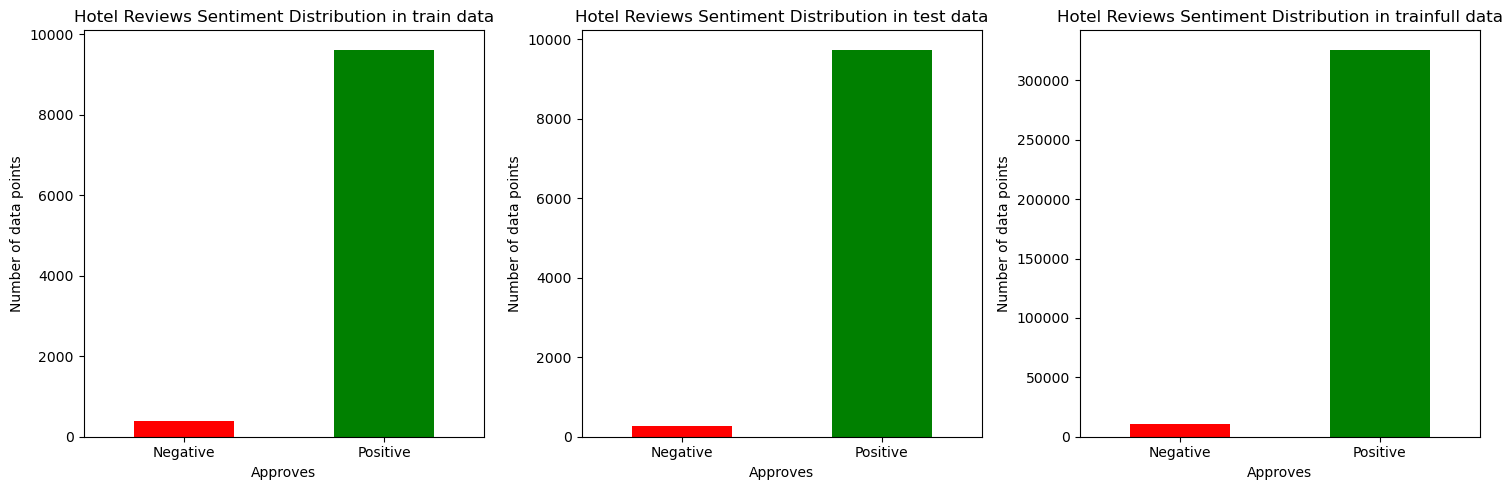

In [11]:
sentiment_counts_train = train['Approves'].value_counts().sort_index()
sentiment_counts_test = test['Approves'].value_counts().sort_index()
sentiment_counts_trainfull = trainfull['Approves'].value_counts().sort_index()

# Subplot of sentiment distribution in all datasets
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sentiment_counts_train.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Approves')
plt.ylabel('Number of data points')
plt.title('Hotel Reviews Sentiment Distribution in train data')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)

plt.subplot(1, 3, 2)
sentiment_counts_test.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Approves')
plt.ylabel('Number of data points')
plt.title('Hotel Reviews Sentiment Distribution in test data')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)

plt.subplot(1, 3, 3)
sentiment_counts_trainfull.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Approves')
plt.ylabel('Number of data points')
plt.title('Hotel Reviews Sentiment Distribution in trainfull data')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)

plt.tight_layout()
plt.show()

## Modelos
### Modelo basado en caracteres

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando únicamente características basadas en los caracteres del texto. Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Ten en cuenta que cada crítica de hotel incluye dos campos de texto, <i>Negative_Review</i> y <i>Positive_Review</i>. Es recomendable que construyas un modelo que analice ambos textos para tomar la decisión. Puedes construir un Pipeline que tenga en cuenta ambas entradas de datos usando <a href=https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html>ColumnTransformer</a></td></tr>
</table>

In [12]:
####### INSERT YOUR CODE HERE
replacements = {'Negative': 0, 'Positive': 1}
train['Approves'] = train['Approves'].replace(replacements)
test['Approves'] = test['Approves'].replace(replacements)
trainfull['Approves'] = trainfull['Approves'].replace(replacements)

In [13]:
####### INSERT YOUR CODE HERE
train['Combined_Review'] = train['Negative_Review'] + ' ' + train['Positive_Review']
test['Combined_Review'] = test['Negative_Review'] + ' ' + test['Positive_Review']
trainfull['Combined_Review'] = trainfull['Negative_Review'] + ' ' + trainfull['Positive_Review']

In [14]:
print("Shape of train data: ", train.shape)
print(train.head())

Shape of train data:  (10000, 4)
                                     Negative_Review  \
0   I am so angry that i made this post available...   
1   My room was dirty and I was afraid to walk ba...   
2   Apart from the price for the brekfast Everyth...   
3                                 Nothing all great    
4                                        No Negative   

                                     Positive_Review  Approves  \
0   Only the park outside of the hotel was beauti...     False   
1   Great location in nice surroundings the bar a...     False   
2   Good location Set in a lovely park friendly s...      True   
3   Rooms were stunningly decorated and really sp...      True   
4   This hotel is being renovated with great care...      True   

                                     Combined_Review  
0   I am so angry that i made this post available...  
1   My room was dirty and I was afraid to walk ba...  
2   Apart from the price for the brekfast Everyth...  
3   Nothing a

In [15]:
stop_words = stopwords.words('english')

# Create a columntransformer with CountVectorizer
vektorizer = CountVectorizer(analyzer = "char", ngram_range = (1,2), binary = True, stop_words = stop_words)
column_transformer = ColumnTransformer(
    [('vektorizer', vektorizer, 'Combined_Review')],
    remainder='drop')

# Fit and transform the data
X_train = column_transformer.fit_transform(train)
X_test = column_transformer.transform(test)

# Get the target variable
y_train = train['Approves']
y_test = test['Approves']

# Create a logistic regression model
model = LogisticRegression(max_iter=1000, C=10, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", accuracy)
print()
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))


Accuracy of the model:  0.9631

ROC AUC score:  0.6788660018425836


Threshold:  0.05
Accuracy:  0.9733

ROC AUC score:  0.5809196110654614

Threshold:  0.1
Accuracy:  0.9734

ROC AUC score:  0.6012393864694605

Threshold:  0.15
Accuracy:  0.9725

ROC AUC score:  0.6136752695401011

Threshold:  0.2
Accuracy:  0.972

ROC AUC score:  0.6263165757824756

Threshold:  0.25
Accuracy:  0.9712

ROC AUC score:  0.6332760638430318

Threshold:  0.3
Accuracy:  0.9699

ROC AUC score:  0.6473491073429446

Threshold:  0.35
Accuracy:  0.9679

ROC AUC score:  0.6518497422872936

Threshold:  0.4
Accuracy:  0.9665

ROC AUC score:  0.6603436791912551

Threshold:  0.45
Accuracy:  0.9646

ROC AUC score:  0.6704234207315555

Threshold:  0.5
Accuracy:  0.9631

ROC AUC score:  0.6788660018425836

Threshold:  0.55
Accuracy:  0.9614

ROC AUC score:  0.6890484549687508

Threshold:  0.6
Accuracy:  0.959

ROC AUC score:  0.6951862503423718

Threshold:  0.65
Accuracy:  0.9559

ROC AUC score:  0.699121971564453

Threshold:  0.7
Accuracy:  0.953

ROC AUC score:  0.7086881551754189

Thr

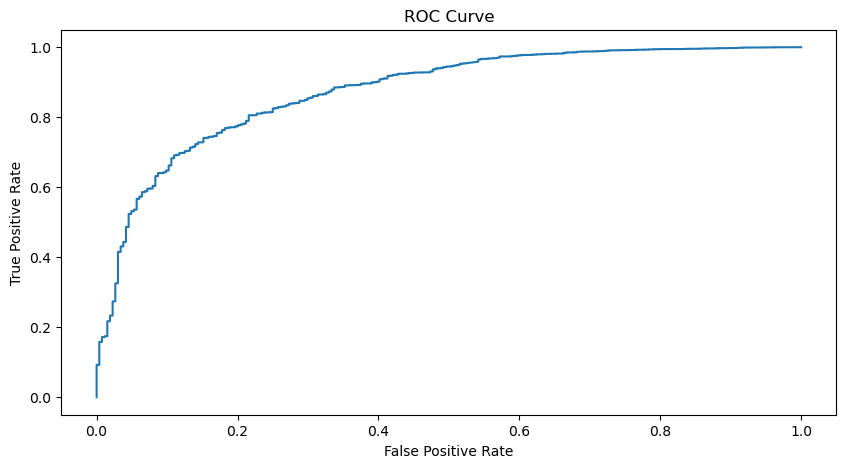

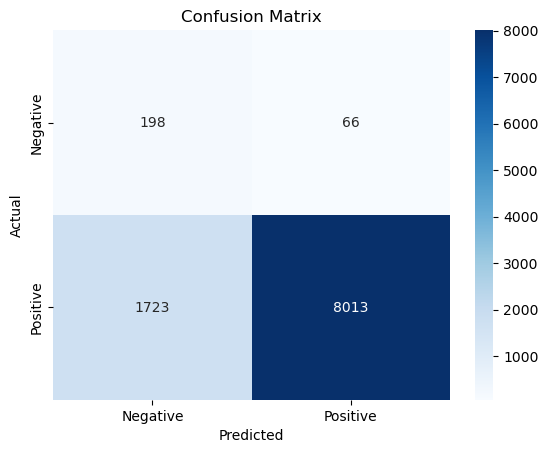

In [16]:
pred_proba_df = pd.DataFrame(model.predict_proba(X_test))  # Get probability of positive class
y_pred_proba = pred_proba_df.iloc[:,1].values


# Get the fpr and tpr
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Create a threshold list
threshold = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

for i in threshold:
    y_pred = (y_pred_proba > i).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    print("Threshold: ", i)
    print("Accuracy: ", accuracy)
    print()
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))
    print()

# Choose a threshold
best_threshold = 0.99
#y_pred = (y_pred_proba > best_threshold).astype(int)


# Get confusion matrix for the chosen threshold
cm = confusion_matrix(y_test, y_pred)
# Convert to dataframe
cm_df = pd.DataFrame(cm, columns=['Negative', 'Positive'], index=['Negative', 'Positive'])



# Measure the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", accuracy)
print()
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

# Plot Roc curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Plot confusion matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Modelo basado en tokens (palabras)

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando únicamente características basadas en los tokens del texto. Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

In [17]:
####### INSERT YOUR CODE HERE
# Based on tokens, create a model that predicts the sentiment of the review
column_transformer = ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df = 10, stop_words=stop_words), 'Combined_Review')], remainder='passthrough')

# Fit the columntransformer on the train and test data
X_train_transformed = column_transformer.fit_transform(train[['Combined_Review']])  
X_test_transformed = column_transformer.transform(test[['Combined_Review']])

# Train a logistic regression model
model = LinearSVC(C=10, random_state=42)
y_train = train['Approves']
model.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred = model.predict(X_test_transformed)

# Calculate the accuracy
accuracy = accuracy_score(test['Approves'], y_pred)
print("Accuracy of the model: ", accuracy)
print()
print("ROC AUC score: ", roc_auc_score(test['Approves'], y_pred))


Accuracy of the model:  0.9753

ROC AUC score:  0.7496218346156718


In [18]:
# Predict decision function scores
decision_scores = model.decision_function(X_test_transformed)

# Set a custom threshold (e.g., 0.0)
custom_threshold = 0.0
y_pred_custom = (decision_scores > custom_threshold).astype(int)

# Calculate accuracy and ROC AUC with the custom threshold
accuracy_custom = accuracy_score(test['Approves'], y_pred_custom)
roc_auc_custom = roc_auc_score(test['Approves'], decision_scores)

print("Accuracy with custom threshold: ", accuracy_custom)
print("ROC AUC score with custom threshold: ", roc_auc_custom)



Accuracy with custom threshold:  0.9753
ROC AUC score with custom threshold:  0.927356063718533


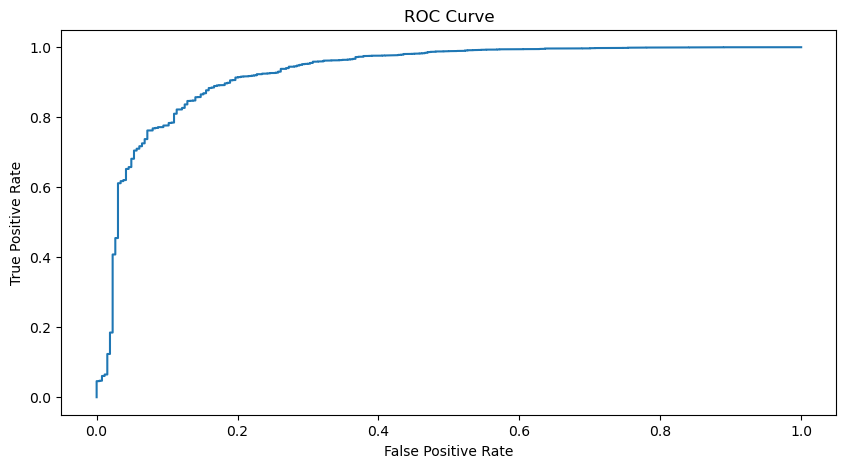

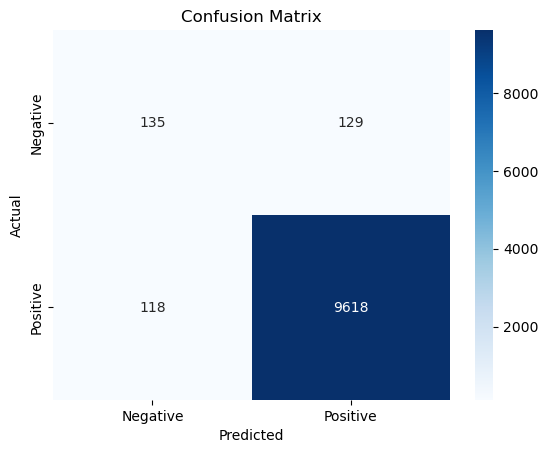

In [19]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(test['Approves'], decision_scores)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Get the confusion matrix
cm = confusion_matrix(test['Approves'], y_pred)
cm_df = pd.DataFrame(cm, columns=['Negative', 'Positive'], index=['Negative', 'Positive'])

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Modelo basado en análisis morfosintáctico

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando algún tipo de análisis morfosintáctico (como n-gramas de lemas, o filtros por POS o stopwords). Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Recuerda que es posible acelerar el análisis morfosintáctico desactivando ciertas componentes del modelo nlp de spaCy. Revisa el notebook del ejercicio correspondiente para recordar cómo.</td></tr>
</table>

In [20]:
####### INSERT YOUR CODE HERE
import spacy

2024-07-08 00:14:40.537404: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [21]:
####### INSERT YOUR CODE HERE
!python -m spacy download en_core_web_sm

2024-07-08 00:14:43.227873: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl#egg=en_core_web_sm==3.3.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 10.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:
!python -m spacy info en_core_web_sm


2024-07-08 00:14:55.615487: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

==================== Info about pipeline 'en_core_web_sm' ====================

lang                en                            
name                core_web_sm                   
version             3.3.0                         
description         English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
author              Explosion                     
email               contact@explosion.ai          
url                 https://explosion.ai          
license             MIT                           
spacy_version       >=3.3.0.dev0,<3.4.0           
spacy_git_version   849bef2de                     
vectors             {'width': 0

In [23]:
####### INSERT YOUR CODE HERE
# Load spaCy English language model
nlp = spacy.load('en_core_web_sm')

def analyze_text(text):
    # Create a spaCy document
    doc = nlp(text)
    
    # Get lemmas and pos tags
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    pos_tags = [token.pos_ for token in doc]
    
    return " ".join(lemmas), " ".join(pos_tags)



# Apply the function to the train and test data
train['lemmas'], train['pos_tags'] = zip(*train['Combined_Review'].apply(analyze_text))
test['lemmas'], test['pos_tags'] = zip(*test['Combined_Review'].apply(analyze_text))

# Remove stopwords
stop_words = set(stopwords.words('english'))
train['lemmas'] = train['lemmas'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
test['lemmas'] = test['lemmas'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Create features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = tfidf_vectorizer.fit_transform(train['lemmas'])
X_test = tfidf_vectorizer.transform(test['lemmas'])

# Train a logistic regression model
model = SGDClassifier(max_iter=1000, tol=0.001, loss='log')

y_train = train['Approves']
y_test = test['Approves']

model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", accuracy)
print()
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

/home/merve/anaconda3/envs/deeplearning-labs/lib/python3.10/site-packages/torch/__init__.py:749: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


Accuracy of the model:  0.9758

ROC AUC score:  0.5471944174696846


/home/merve/anaconda3/envs/deeplearning-labs/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [24]:
# Set a custom threshold (e.g., 0.0)
custom_threshold = 0.0
y_pred_custom = (decision_scores > custom_threshold).astype(int)

# Calculate accuracy and ROC AUC with the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom)
roc_auc_custom = roc_auc_score(y_test, decision_scores)

print("Accuracy with custom threshold: ", accuracy_custom)
print("ROC AUC score with custom threshold: ", roc_auc_custom)

Accuracy with custom threshold:  0.9753
ROC AUC score with custom threshold:  0.927356063718533


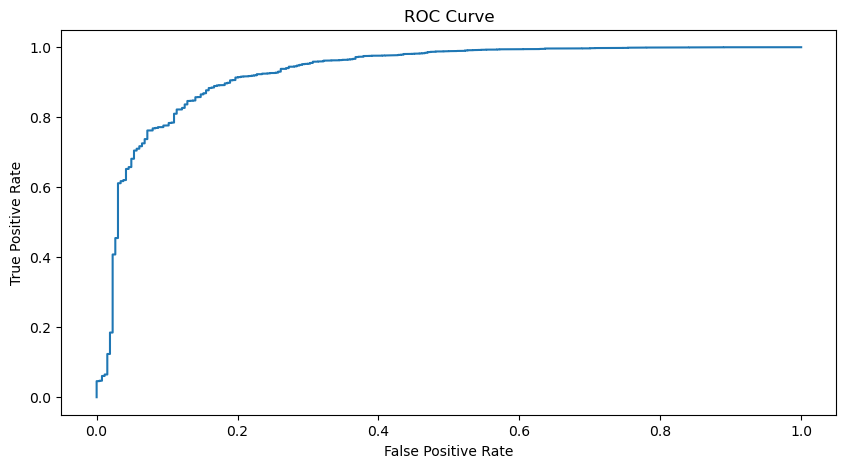

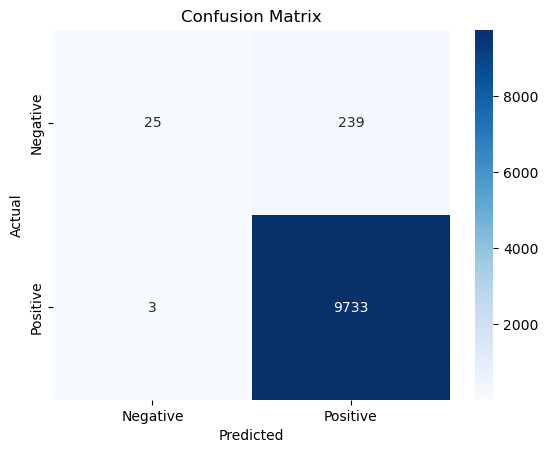

In [25]:
# Plot auc roc curve
fpr, tpr, _ = roc_curve(y_test, decision_scores)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Negative', 'Positive'], index=['Negative', 'Positive'])

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
train.head()

,Negative_Review,Positive_Review,Approves,Combined_Review,lemmas,pos_tags
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,False,I am so angry that i made this post available...,angry post available possible site use plane t...,SPACE PRON AUX ADV ADJ SCONJ PRON VERB DET NOU...
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,False,My room was dirty and I was afraid to walk ba...,room dirty afraid walk barefoot floor look cle...,SPACE PRON NOUN AUX ADJ CCONJ PRON AUX ADJ PAR...
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,True,Apart from the price for the brekfast Everyth...,apart price brekfast good good location Set lo...,SPACE ADV ADP DET NOUN ADP DET ADJ PRON ADV AD...
3,Nothing all great,Rooms were stunningly decorated and really sp...,True,Nothing all great Rooms were stunningly dec...,great room stunningly decorate spacious buildi...,SPACE PRON PRON ADJ SPACE NOUN AUX ADV VERB CC...
4,No Negative,This hotel is being renovated with great care...,True,No Negative This hotel is being renovated wit...,Negative hotel renovate great care appreciatio...,PRON PROPN SPACE DET NOUN AUX AUX VERB ADP ADJ...


### Modelo basado en Deep Learning

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando una aproximación basada en Embeddings y algún tipo de modelo de mezcla (CNN, LSTM, GRU, ...). Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

In [27]:
####### INSERT YOUR CODE HERE
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop, SGD, Adagrad, Adadelta, Adamax, Nadam

In [28]:
####### INSERT YOUR CODE HERE
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train['lemmas'])

X_train = tokenizer.texts_to_sequences(train['lemmas'])
X_test = tokenizer.texts_to_sequences(test['lemmas'])

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Create a simple LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=100))
model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
optimizer = ['Adam', 'RMSprop', 'SGD', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

# Compile the model for all optimizers
for opt in optimizer:
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=64)
    y_pred = model.predict(X_test)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the model with optimizer ", opt, ": ", accuracy)
    print()
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))
    print()

# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, epochs=5, batch_size=64)

# # Evaluate the model
# y_pred = model.predict(X_test)
# y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy of the model: ", accuracy)
# print()
# print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

2024-07-08 00:16:37.737808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-08 00:16:37.784852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-08 00:16:37.784993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-08 00:16:37.785438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

Epoch 1/5
  1/157 [..............................] - ETA: 6:24 - loss: 0.6948 - accuracy: 0.3281

2024-07-08 00:16:40.873641: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


157/157 [==============================] - 23s 129ms/step - loss: 0.1857 - accuracy: 0.9573
Epoch 2/5
157/157 [==============================] - 20s 128ms/step - loss: 0.1186 - accuracy: 0.9634
Epoch 3/5
157/157 [==============================] - 20s 128ms/step - loss: 0.0623 - accuracy: 0.9796
Epoch 4/5
157/157 [==============================] - 20s 127ms/step - loss: 0.0387 - accuracy: 0.9869
Epoch 5/5
313/313 [==============================] - 5s 17ms/step
Accuracy of the model with optimizer  Adam :  0.9778

ROC AUC score:  0.6643043001917284

Epoch 1/5
157/157 [==============================] - 21s 127ms/step - loss: 0.0278 - accuracy: 0.9919
Epoch 2/5
157/157 [==============================] - 20s 127ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 3/5
157/157 [==============================] - 20s 128ms/step - loss: 0.0246 - accuracy: 0.9925
Epoch 4/5
157/157 [==============================] - 20s 127ms/step - loss: 0.0247 - accuracy: 0.9930
Epoch 5/5
313/313 [===================

In [29]:
# Predict probabilities directly from the model
y_pred_proba = model.predict(X_test)[:, 0]  # Probability of class 1 (positive sentiment)

# Set a custom threshold (e.g., 0.5)
custom_threshold = 0.5
y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)

# Calculate accuracy and ROC AUC with the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom)
roc_auc_custom = roc_auc_score(y_test, y_pred_proba)

print("Accuracy with custom threshold: ", accuracy_custom)
print("ROC AUC score with custom threshold: ", roc_auc_custom)


313/313 [==============================] - 5s 17ms/step
Accuracy with custom threshold:  0.9758
ROC AUC score with custom threshold:  0.8911469226986379


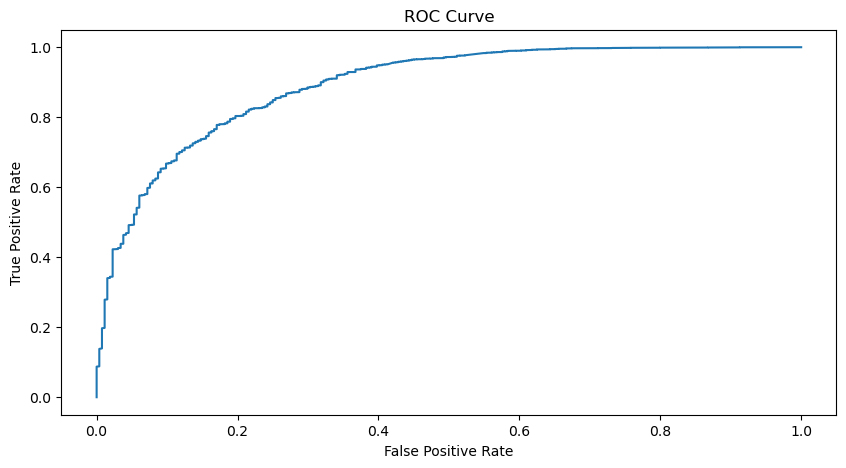

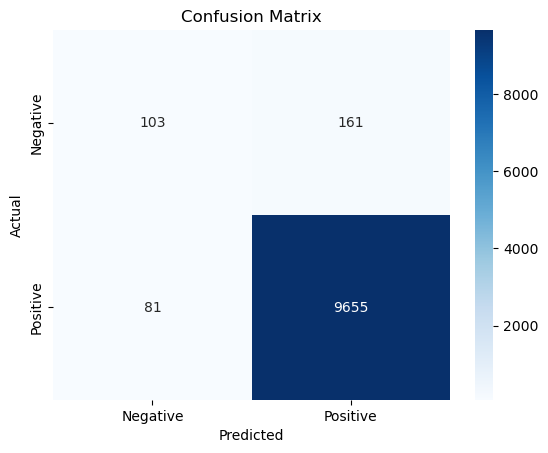

In [30]:
####### INSERT YOUR CODE HERE
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Negative', 'Positive'], index=['Negative', 'Positive'])

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Otras aproximaciones

<table>
<tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">Intenta mezclar varias de las features de puntos anteriores en un único modelo, o probar otras aproximaciones. ¿Puedes conseguir un acierto aún mejor?</td></tr>
</table>

In [31]:
####### INSERT YOUR CODE HERE

from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, GRU, Dense

# Create a model with CNN + GRU
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=100))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(units=100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = ['Adam', 'RMSprop', 'SGD', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

# Compile the model for all optimizers
for opt in optimizer:
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=64)
    y_pred = model.predict(X_test)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the model with optimizer ", opt, ": ", accuracy)
    print()
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))
    print()

Epoch 1/5


2024-07-08 00:29:14.932563: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8902


157/157 [==============================] - 12s 64ms/step - loss: 0.1632 - accuracy: 0.9616
Epoch 2/5
157/157 [==============================] - 10s 64ms/step - loss: 0.0732 - accuracy: 0.9729
Epoch 3/5
157/157 [==============================] - 10s 64ms/step - loss: 0.0392 - accuracy: 0.9872
Epoch 4/5
157/157 [==============================] - 10s 64ms/step - loss: 0.0258 - accuracy: 0.9913
Epoch 5/5
313/313 [==============================] - 3s 10ms/step
Accuracy of the model with optimizer  Adam :  0.9711

ROC AUC score:  0.684817048878265

Epoch 1/5
157/157 [==============================] - 11s 64ms/step - loss: 0.0209 - accuracy: 0.9937
Epoch 2/5
157/157 [==============================] - 10s 64ms/step - loss: 0.0154 - accuracy: 0.9946
Epoch 3/5
157/157 [==============================] - 10s 65ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 4/5
157/157 [==============================] - 10s 64ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 5/5
313/313 [============================

In [32]:
y_pred_proba = model.predict(X_test)[:, 0]  # Probability of class 1 (positive sentiment)
custom_threshold = 0.5  
y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)
accuracy_custom = accuracy_score(y_test, y_pred_custom)
roc_auc_custom = roc_auc_score(y_test, y_pred_proba)
print("Accuracy with custom threshold: ", accuracy_custom)
print("ROC AUC score with custom threshold: ", roc_auc_custom)


313/313 [==============================] - 3s 10ms/step
Accuracy with custom threshold:  0.9737
ROC AUC score with custom threshold:  0.8891409343019346


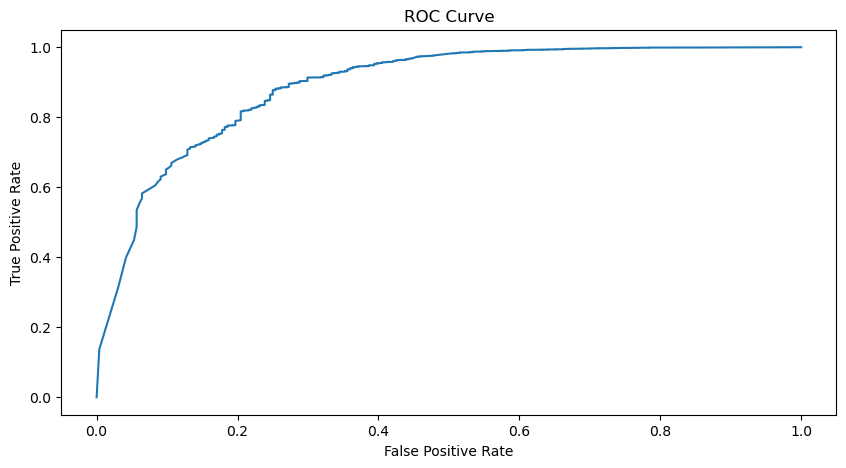

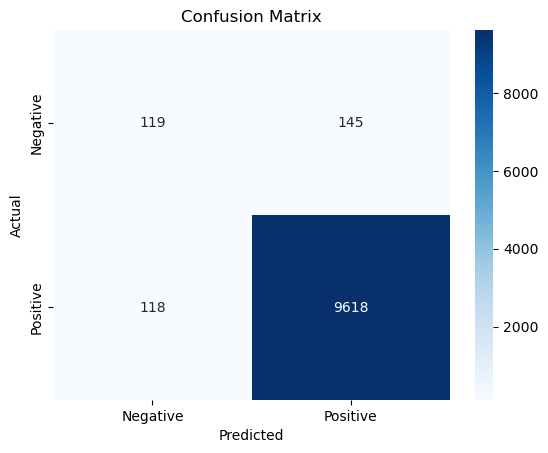

In [33]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Negative', 'Positive'], index=['Negative', 'Positive'])

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Informe

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Escribe un informe explicando qué decisiones has tomado a la hora de diseñar el modelo, qué cosas has probado, qué ha funcionado y qué no. Además, realiza una tabla comparativa con los scores sobre el conjunto de test de todos los modelos realizados en la práctica indicando con cuál se ha conseguido mejores resultados.</td></tr>
</table>

### Modelo basado en caracteres
 
 Primero, creamos un modelo basado en caracteres. Para ello, configuramos CountVectorizer con analyzer='char'. Usando ngram, creamos tanto caracteres simples como combinaciones de 2 caracteres. Eliminamos las palabras de parada, creamos pipeline con ColumnTransformer y las aplicamos a la columna Combined_Review, combinando las columnas con comentarios positivos y negativos.

 Aplicamos el modelo de **Logistic Regression** y realizamos nuestra predicción.

 **Accuracy of the model:  0.9631**

**ROC AUC score:  0.6788** 

Obtenidos los valores, luego aplicamos el umbral.

 A partir de las predicciones del modelo, obtenemos las estimaciones de probabilidad de la clase positiva definiendo pred_proba.

**Threshold: 0,99**

**Accuracy: 0,8211**

**ROC AUC score: 0,7865**

En estos resultados, observamos que la puntuación ROC AUC aumenta cuando se aplica un umbral de 0,99. También a partir de la curva ROC AUC, observamos que la precisión aumenta gradualmente.

En la matriz de confusión, podemos ver que predice correctamente los valores positivos con una alta probabilidad, pero tiene dificultades para hacerlo con los valores negativos.

---

### Modelo basado en tokens (palabras)

Primero, creamos un modelo basado en tokens. Para evaluar la importancia de las palabras en función de su frecuencia dentro de un documento y su rareza entre los documentos del corpus, configuramos TfidfVectorizer. Usando ngram, creamos tanto unigramas como bigramas y limitamos el tamaño del vocabulario a las 5000 características más informativas con max_features=5000. Eliminamos las palabras de parada y las aplicamos a la columna Combined_Review, combinando las columnas con comentarios positivos y negativos.

Aplicamos el modelo de **Linear Support Vector Classification** y realizamos nuestras predicciones.

**Accuracy of the model: 0,9753**

**ROC AUC score: 0,7496**

A partir de las predicciones del modelo,  Obtenemos las puntuaciones de la función de decisión para los datos de prueba aplicando threshold.

**Accuracy with custom threshold:  0.9753**

**ROC AUC score with custom threshold:  0.9273**

A partir de la curva ROC AUC, observamos que la precisión aumenta gradualmente.

En la matriz de confusión, podemos ver que el modelo predice correctamente los valores positivos con una alta probabilidad, pero tiene un rendimiento inferior para los valores negativos.

---

### Modelo basado en análisis morfosintáctico

Primero, creamos un modelo basado en análisis morfosintáctico. Creamos un pequeño modelo de lengua inglesa spaCy para el tratamiento de textos. Para cada token (excepto las stop words) extraemos lemas (formas básicas de las palabras) y etiquetas de parte de la oración (POS). Para evaluar la importancia de las palabras en función de su frecuencia dentro de un documento y su rareza entre los documentos del corpus, configuramos TfidfVectorizer. Usando ngram, creamos tanto unigramas como bigramas y limitamos el tamaño del vocabulario a las 5000 características más informativas con max_features=5000. Eliminamos las palabras de parada y las aplicamos a la columna Combined_Review, combinando las columnas con comentarios positivos y negativos.

Aplicamos el modelo de **Stochastic Gradient Descent Classifier** y realizamos nuestras predicciones.

**Accuracy of the model: 0.9759**

**ROC AUC score: 0.5490**

A partir de las predicciones del modelo, aplicamos un threshold.

**Accuracy with custom threshold: 0.9753**

**ROC AUC score with custom threshold: 0.9273**

A partir de la curva ROC AUC, observamos que la precisión aumenta gradualmente.

En la matriz de confusión, podemos ver que el modelo predice correctamente los valores positivos con una alta probabilidad, y también que predice correctamente los valores negativos.

---

### Modelo basado en Deep Learning
Primero, creamos un modelo basado en Deep Learning. Ya hemos creado un modelo de lenguaje en inglés spaCy. Para evaluar la importancia de las palabras en función de su frecuencia dentro de un documento y su rareza entre los documentos del corpus, configuramos TfidfVectorizer previamente. Usando ngram, creamos tanto unigramas como bigramas y limitamos el tamaño del vocabulario a las 5000 características más informativas con max_features=5000. Eliminamos las palabras de parada y las aplicamos a la columna Combined_Review, combinando las columnas con comentarios positivos y negativos.

Con texts_to_sequence convertimos los lemas de los datos de entrenamiento en secuencias de índices enteros basadas en el vocabulario adecuado. Aplicamos el modelo LSTM y realizamos nuestras predicciones. Utilizamos capas de embedding. Creamos una lista de optimizadores y los probamos todos en el bucle for.

**Accuracy of the model with optimizer  SGD :  0.9771**

**ROC AUC score:  0.7044**


**Accuracy of the model with optimizer  Adagrad :  0.9768**

**ROC AUC score:  0.7043**


**Accuracy of the model with optimizer  Adadelta :  0.9769**

**ROC AUC score:  0.7043**


**Accuracy of the model with optimizer  Adamax :  0.9767**

**ROC AUC score:  0.7061**


A**ccuracy of the model with optimizer  Nadam :  0.9699**

**ROC AUC score:  0.7210**

Podemos observar que el mejor optimizador es **Nadam**, con una elevada **roc auc score = 0,72**

A partir de las predicciones del modelo, obtenemos las puntuaciones de la función de decisión para los datos de prueba aplicando un threshold.

**Accuracy with custom threshold:  0.9699**

**ROC AUC score with custom threshold:  0.8881**

A partir de la curva ROC AUC, observamos que la precisión aumenta gradualmente.

En la matriz de confusión, podemos ver que el modelo predice correctamente los valores positivos con una alta probabilidad, pero tiene un rendimiento inferior para los valores negativos.

---

### Otras aproximaciones

 Ya hemos realizado los pasos de spaCy y TfidfVectorizer mencionados anteriormente. Eliminamos las palabras de parada y las aplicamos a la columna Combined_Review, combinando las columnas con comentarios positivos y negativos.

 Aplicamos el modelo **GRU-CNN** y realizamos nuestras predicciones. Implementamos una capa **convolucional** para definir el número de filtros de salida (mapas de características) a aprender, **max pooling** para reducir la dimensionalidad de los mapas de características, **embedding** para incrustar palabras en vectores y capas **GRU** de 100 unidades ocultas con una arquitectura similar al LSTM pero más simple. Implementamos dropout para la regularización. Creamos una lista de optimizadores y los probamos todos en el bucle for.

**Accuracy of the model with optimizer  Adam :  0.9736**

**ROC AUC score:  0.6916**


**Accuracy of the model with optimizer  RMSprop :  0.9734**

**ROC AUC score:  0.7210**


**Accuracy of the model with optimizer  SGD :  0.9739**

**ROC AUC score:  0.7102**


**Accuracy of the model with optimizer  Adagrad :  0.974**

**ROC AUC score:  0.7102**


**Accuracy of the model with optimizer  Adadelta :  0.9741**

**ROC AUC score:  0.7103**


**Accuracy of the model with optimizer  Adamax :  0.975**

**ROC AUC score:  0.6905**


**Accuracy of the model with optimizer  Nadam :  0.9755**

**ROC AUC score:  0.6704**

Podemos observar que el mejor optimizador es **RMSprop**, con una elevada **roc auc score = 0,72**

A partir de las predicciones del modelo, aplicamos un threshold.

**Accuracy with custom threshold:  0.9755**

**ROC AUC score with custom threshold:  0.8826**

A partir de la curva ROC AUC, observamos que la precisión aumenta gradualmente.

En la matriz de confusión, podemos ver que el modelo predice correctamente los valores positivos con una alta probabilidad, pero tiene un rendimiento inferior para los valores negativos.

---

En el análisis del modelo basado en tokens de palabras, se obtuvo el mejor resultado con una puntuación ROC AUC de 0,92. Este resultado se alcanzó utilizando el clasificador lineal Support Vector Machines (SVM) junto con la aplicación de un threshold.

En cuanto a las matrices de confusión, el modelo basado en análisis morfosintáctico, el mejor resultado lo obtenemos con el clasificador SGD y luego un threshold. Los resultados son: True Positive = 9733, True Negative = 23 False Positive = 238, False Negative = 3.

---